In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("C:/Users/admin/Desktop/JuliaDQMC/code/")
from Plt_Lib import *
from DP_Lib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


power fit: (s=0.3116) ± 0.0004
3 order poly fit: (s=0.3111) ± 0.0015


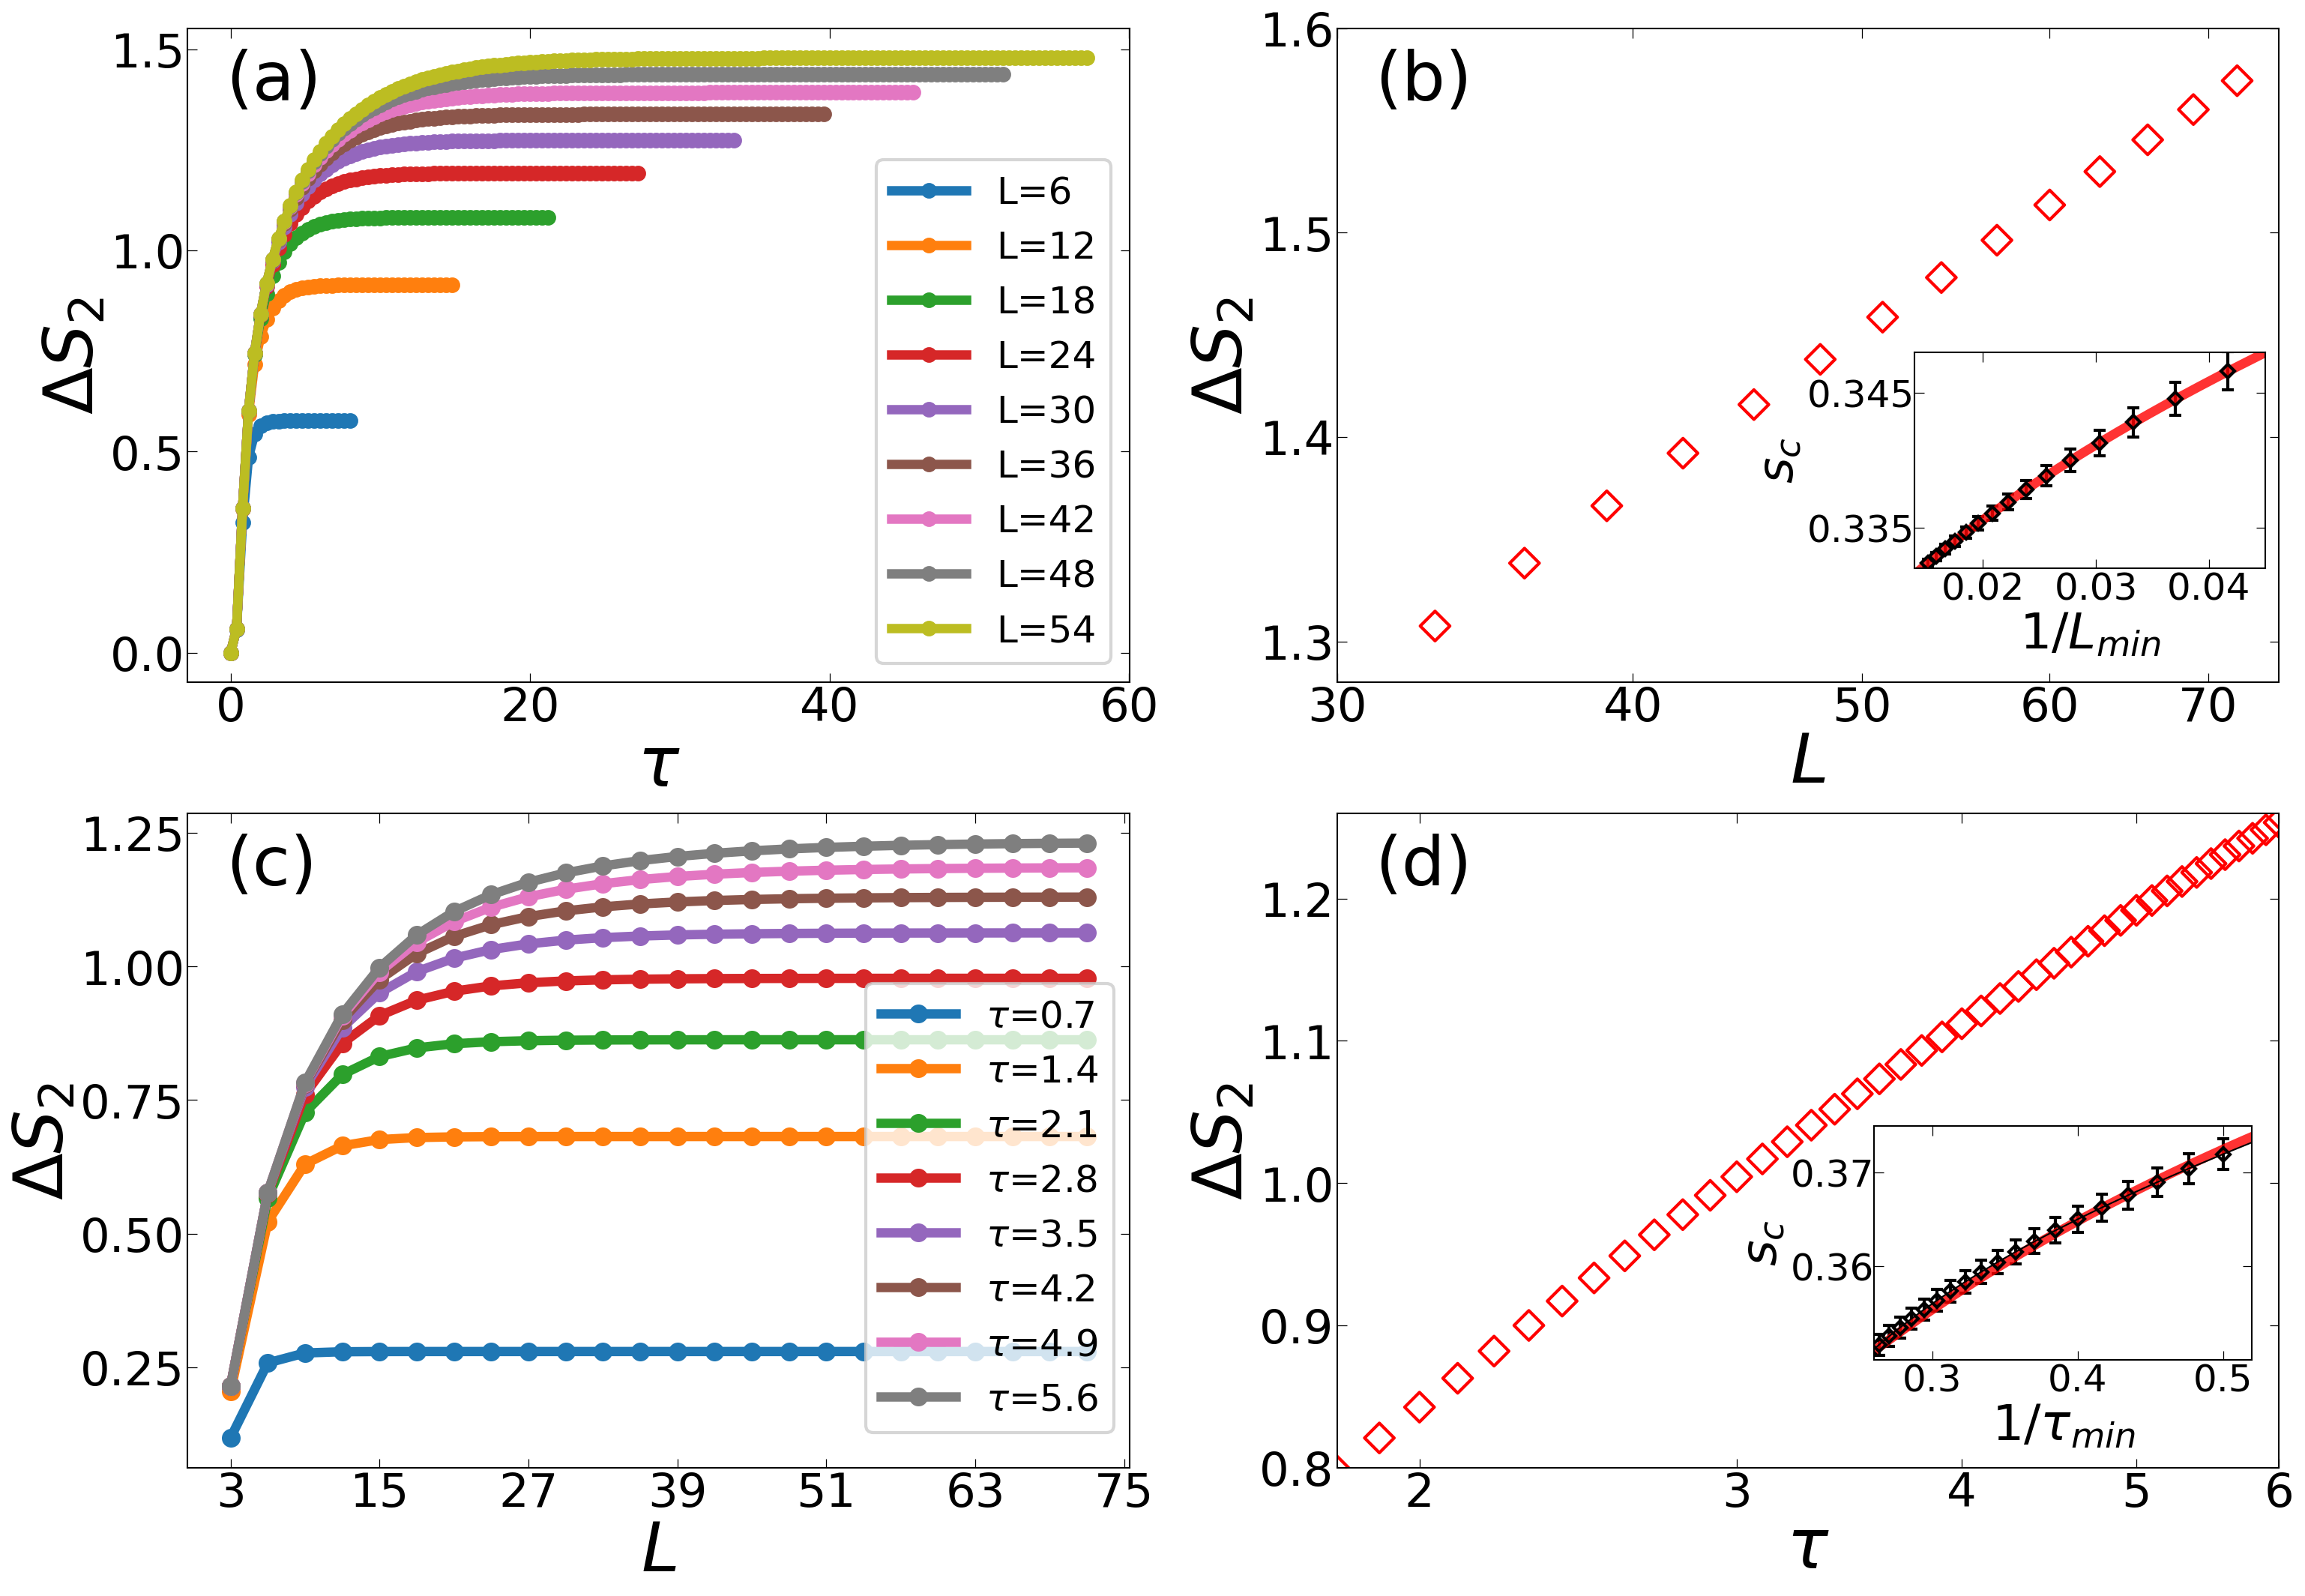

In [6]:
plt.rcParams.update({
    "legend.fancybox": True,
    "legend.frameon": True,
    "text.usetex": False,
    "font.size":11,
    # 全局默认字号（可按需调整）
    "axes.labelsize": 18,    # x/y label
    "axes.titlesize": 18,   # subplot title
    "xtick.labelsize": 15,  # x tick labels
    "ytick.labelsize": 15,  # y tick labels
    "legend.fontsize": 18   # legend texts
})

fig=plt.figure(figsize=(12,8), dpi=300)

ax=plt.subplot(2,2,1)
ax.text(0.04, 0.97, '(a)', transform=ax.transAxes, fontsize=22, va='top')
path="./"
dataC=pd.read_csv(os.path.join(path, "neq-eqC.csv"),index_col=0)

LL=[]
ECeq=[]
count=0
for i in range(1,dataC.shape[0]):
    L=dataC.index[i]
    EC=dataC.iloc[i,:].values
    EC=EC[np.isnan(EC)==False]
    if abs(EC[-1]-EC[-2])<1e-3:
        LL.append(L)
        ECeq.append(EC[-1])
        if i%2==1:
            plt.plot(np.array(range(len(EC)))*0.4,EC,'-o',label=f'L={L}',lw=3,color=colors[count%len(colors)])
            count+=1
plt.xlabel(r"$\tau$",fontsize=22)
plt.ylabel(r"$\Delta S_2$",fontsize=22)
plt.legend(ncol=1,fontsize=12)
# plt.title(r"Convergence of $\Delta S_2$ from AFM to ground state ")


ax=plt.subplot(2,2,2)
ax.text(0.04, 0.97, '(b)', transform=ax.transAxes, fontsize=22, va='top')
plt.rcParams.update({
    "legend.fancybox": False,
    "legend.frameon": False})
# 数据路径处理
base_path = "./"
Data = pd.read_csv(os.path.join(base_path, "eq.csv"), header=None)

L = Data[0].values
ECeq = Data[1].values

num = 10

Lmin_idx = list(range(0, len(L)-2))
para_log = []
dpara_log = []

for i in Lmin_idx:
    # params=EEfit_F(L[i:], ECeq[i:], 0, 0)
    params,ds= linear_fit(np.log(L[i:]),ECeq[i:],False)
    para_log.append(params[0])
    dpara_log.append(ds)


plt.scatter(L[num:],ECeq[num:],s=45, label="Data", marker='D',facecolors='none',edgecolors='red')
# axins.plot(L[num:], coeffs[-1]*np.log(L[num:]) + ECeq[num+5]-coeffs[-1]*np.log(L[num+5]), 'r--', label="Linear Fit: Slope={:.3f}".format(pram[0]))
plt.xlabel(r"$L$",fontsize=22,labelpad=0.)
plt.ylabel(r"$\Delta S_2$",fontsize=22)
# axins.legend()
plt.xscale('log')
plt.xlim(33,75)
plt.xticks([30, 40,50,60,70],[30, 40,50,60,70])
plt.ylim(1.28,1.6)
# axins.text(0.59, 0.54, '(c)', transform=ax.transAxes, fontsize=20, va='top')

# plt.legend(ncol=1,bbox_to_anchor=(0.01, 0.9), loc='upper left', borderaxespad=0.,fontsize=16)


axins = fig.add_axes([0.765, 0.58, 0.13, 0.12])  # [左, 下, 宽, 高]比例
x_inv = 1 / L[Lmin_idx]

axins.errorbar(x_inv, para_log, yerr=dpara_log , marker='D',linestyle='',markersize=3,markerfacecolor='none',ecolor='black',capsize=2,elinewidth=1,label=r"$[L_{min},L_{max}=90]$")
# axins.errorbar(x_inv, para_log, yerr=dpara_log, marker='D',markersize=5, label=r"$[L_{min},L_{max}=90]$",facecolors='none',edgecolors='black',capsize=3,elinewidth=1)
x_fit = np.linspace(0.012, 0.3, 1000)
start=13
eend=-2
# for Nfit in [3]:
#     coeffs, dcoeffs = np.polyfit(x_inv[start:eend], para_log[start:eend], Nfit, cov=True)
#     dcoeffs=np.sqrt(np.diag(dcoeffs))
#     y_fit = np.polyval(coeffs, x_fit)
#     axins.plot(x_fit, y_fit,linewidth=3,alpha=0.8,linestyle='-',color='red',
#              label=r"$Fit:c+\sum_n a_n L_{min}^{-n}$")
#     print(f"{Nfit} order poly fit: (s={coeffs[-1]:.4f}) ± {dcoeffs[-1]:.4f}")

popt, pcov = curve_fit(lambda x, a, b, c: a + b*x**c, x_inv[start:eend], para_log[start:eend])
perr = np.sqrt(np.diag(pcov))  # 参数的标准误差
# coeffs = powerfit(x_inv[start:eend], para_log[start:eend] )
y_fit = popt[0] + popt[1]*x_fit**popt[2]
axins.plot(x_fit, y_fit,linewidth=3,alpha=0.8,linestyle='-',color='red',
         label=r"$Fit:c+a L_{min}^{-b}$")
print(f"power fit: (s={popt[0]:.4f}) ± {perr[0]:.4f}")


axins.set_xlim(0.014,0.045)
axins.set_ylim(0.332,0.348)
axins.set_xlabel(r"$1/L_{min}$",fontsize=16)
axins.set_xticks([0.02,0.03,0.04],[0.02,0.03,0.04],fontsize=12)
axins.set_yticks([0.335,0.345],[0.335,0.345],fontsize=12)
axins.tick_params(axis='y', pad=0, labelsize=12)
# plt.title(f"equilibrium scaling coefficient of $\ln L$",fontsize=12)
axins.set_ylabel(r"$s_c$",fontsize=16)



ax=plt.subplot(2,2,3)
ax.text(0.04, 0.97, '(c)', transform=ax.transAxes, fontsize=22, va='top')

dataSC=pd.read_csv(os.path.join(path, f"neq.csv"),index_col=0)
LMAX=74
Avg=[]
Theta=[]
count=0
for i, (idx, col) in enumerate(dataSC.items()):
    # print(i, idx)
    data=[(col.index[i],col.values[i],0) for i in range(len(col.values))]
    index=unit_neardata(data)
    Theta.append(idx)
    avg = np.mean(col.values[index])
    Avg.append(avg)
    if i%7==6:
        col.plot(linestyle='-',marker="o",markersize=5,label=r'$\tau$='+f'{float(idx):.1f}',lw=3,color=colors[count%len(colors)])
        count+=1
        # for iii in index:
            # plt.text(col.index[iii].astype(float),col.values[iii], "[  ]", color='blue',ha='center',va='center',fontsize=10)
            # plt.axhline(avg, color="black", linestyle='--',linewidth=0.2)
            # plt.axhline(avg, color="black", linestyle='--')
    # plt.text(2, avg, f'{avg:.2f}', ha='center', va='bottom')

plt.xlabel(r'$L$',fontsize=22)
plt.ylabel(r'$\Delta S_2$',fontsize=22)
plt.rcParams.update({
    "legend.fancybox": True,
    "legend.frameon": True})
plt.xticks(np.arange(3,LMAX+2,12),np.arange(3,LMAX+2,12))
plt.legend(ncol=1,bbox_to_anchor=(0.72, 0.74), loc='upper left', borderaxespad=0.,fontsize=12)
# plt.title(r'Non-equilibrium $\Delta S_2$ vs L',fontsize=12)


ax=plt.subplot(2,2,4)
plt.rcParams.update({
    "legend.fancybox": False,
    "legend.frameon": False})
ax.text(0.04, 0.97, '(d)', transform=ax.transAxes, fontsize=22, va='top')

Theta=np.array(Theta).astype(float)
t_finite=[]
s_finite=[]
ds_finite=[]
for xidx in range(5,len(Avg)-4):
    # para=EEfit_F(Theta[xidx:],Avg[xidx:],0,0)
    para,ds=linear_fit(np.log(Theta[xidx:]),Avg[xidx:],False)
    s_finite.append(para[0])
    ds_finite.append(ds)
    t_finite.append(Theta[xidx])


plt.scatter(Theta[num:],Avg[num:],s=45, label="Data", marker='D',facecolors='none',edgecolors='red')
# axins.plot(L[num:], coeffs[-1]*np.log(L[num:]) + ECeq[num+5]-coeffs[-1]*np.log(L[num+5]), 'r--', label="Linear Fit: Slope={:.3f}".format(pram[0]))
plt.xlabel(r"$\tau$ ",fontsize=22,labelpad=0.)
plt.ylabel(r"$\Delta S_2$",fontsize=22)
# axins.legend()
plt.xscale('log')
plt.ylim(0.8,1.26)
plt.xticks(range(1,8,1),range(1,8,1))
plt.xlim(1.8,6)
# axins.text(0.59, 0.54, '(f)', transform=ax.transAxes, fontsize=18, va='top')

axins = fig.add_axes([0.75, 0.14, 0.14, 0.13])  # [左, 下, 宽, 高]比例
# axins.scatter(1/np.array(t_finite)[:-18],s_finite[:-18],marker='D',s=40,label=r"$[\tau_{min},\tau_{max}=6.0]$", facecolors='none',edgecolors='black')
axins.errorbar(1/np.array(t_finite)[:-16],s_finite[:-16], yerr=ds_finite[:-16], marker='D',markersize=3,markerfacecolor='none',ecolor='black',capsize=2,elinewidth=1,label=r"$[\tau_{min},\tau_{max}=6.0]$")

x_fit = np.linspace(0.1, 1.2, 1000)
start=3
eend=-11
for Nfit in [3]:
    coeffs,dcoeffs = np.polyfit(1/np.array(t_finite)[start:eend], s_finite[start:eend], Nfit,cov=True)
    dcoeffs=np.sqrt(np.diag(dcoeffs))
    y_fit = np.polyval(coeffs, x_fit)
    axins.plot(x_fit, y_fit, linewidth=3,alpha=0.8,color='red',linestyle='-',
             label=r"$Fit:c+\sum_n a_n \tau_{min}^{-n}$")
    print(rf"{Nfit} order poly fit: (s={coeffs[-1]:.4f}) ± {dcoeffs[-1]:.4f}")

axins.set_xlabel(r"$1/\tau_{min}$",fontsize=16)
axins.set_ylabel(r"$s_c$",fontsize=16)
axins.set_xlim(0.26,0.52)
axins.set_ylim(0.35,0.375)
axins.set_xticks([0.3,0.4,0.5],[0.3,0.4,0.5],fontsize=12)
axins.set_yticks([0.36,0.37],[0.36,0.37],fontsize=12)
axins.tick_params(axis='y', pad=0, labelsize=12)
# plt.title(r"non-equalibrium scaling coefficient of $\ln \Theta$",fontsize=12)
# axins.legend(ncol=1,bbox_to_anchor=(0.01, 0.9), loc='upper left', borderaxespad=0.,fontsize=16)



# 减少图下面的空白：调整子图底部边距并使用 tight bbox 保存
fig.subplots_adjust(bottom=0.08, hspace=0.25)
plt.savefig("SC_neqSDW_U=0.pdf", bbox_inches='tight', pad_inches=0.05)
plt.subplots_adjust(wspace=0.22, hspace=0.2)
plt.show()